In [1]:
import pandas as pd
%matplotlib inline

In [2]:
file_path = "data/clean_data/full_data.csv"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384361 entries, 0 to 384360
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PT      384361 non-null  object 
 1   AU      384361 non-null  object 
 2   TI      384361 non-null  object 
 3   LA      384361 non-null  object 
 4   DE      384361 non-null  object 
 5   AB      384361 non-null  object 
 6   C1      384361 non-null  object 
 7   PY      384361 non-null  float64
dtypes: float64(1), object(7)
memory usage: 23.5+ MB


## Language Analysis

In [3]:
df1 = df.groupby("LA").count().sort_values(by="AB", ascending=False)
df1["PT"]

LA
English                                                                                      376059
Spanish                                                                                        2740
Portuguese                                                                                     1221
Chinese                                                                                         895
French                                                                                          765
Russian                                                                                         701
German                                                                                          530
Korean                                                                                          339
Turkish                                                                                         222
Polish                                                                                          2

Option proposée 
On modifie la base de données en proposant un nombre fixe de langues.


## Language issue ["LA"]:

```python
    # Only keeping main languages to filter wrongly parsed rows
    lst_of_language = ["English", "Spanish", "Portugese", "Chinese", "French", "Russian", "German",
                       "Korean", "Turkish",
                       "Polish", "Czech", "Japanese", "Italian"]
    condition = df.LA.isin(lst_of_language)
    df = df[condition]
```

## Country issues ["C1"]:
USA + post code ==>  US or United States
Peoples R China ==> China
England ==> United Kingdom

```python
    # fixing countries
    df['C1'] = df['C1'].apply(lambda x: x.split(", ")[-1] if "USA" not in x else "United States")
    df['C1'] = df['C1'].replace(['Peoples R China'], 'China')
```

## Year issue ["PY"] for Published Year :
Some mistakes where PY is not a date but a random float like 4.
```python
    condition_year = df.PY > 2009
    df = df[condition_year]
```

## Duplicates
We have no reason to keep them.
```python
    # Dropping duplicated
    print(df.duplicated().sum())
    df = df.drop_duplicates()
    33245

```

## Saving new file
```python
    columns = ['PT', 'AU', 'TI', 'LA', 'DE', 'AB', 'C1', 'PY']
    df.to_csv("data/clean_data/full_data_fixed_language_country_year_no_dups.csv", columns=columns, header=True, 
              index=False, sep='\t')
   
```

In [4]:
# Voir script fixed_languages_country_year_no_dups.py
file_path = "data/clean_data/full_data_fixed_language_country_year_no_dups.csv"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349497 entries, 0 to 349496
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PT      349497 non-null  object 
 1   AU      349497 non-null  object 
 2   TI      349497 non-null  object 
 3   LA      349497 non-null  object 
 4   DE      349497 non-null  object 
 5   AB      349497 non-null  object 
 6   C1      349497 non-null  object 
 7   PY      349497 non-null  float64
dtypes: float64(1), object(7)
memory usage: 21.3+ MB


In [5]:
df_language = df.groupby("LA").count().sort_values(by="AB", ascending=False)
df_language["PT"]

LA
English     343467
Spanish       2453
Chinese        834
French         681
Russian        622
German         482
Korean         296
Turkish        197
Polish         180
Czech          111
Japanese        97
Italian         77
Name: PT, dtype: int64

## Country analysis 

In [6]:
#  Address 
df_address = df.groupby("C1").count().sort_values(by = "AB", ascending=False)

df_address.reset_index(level=0, inplace=True)

df_address = df_address[["C1", "PT"]]
df_address['C1'] = df_address['C1'].replace(['United States'], 'US')
df_address['C1'] = df_address['C1'].replace(['England'], 'UK')
tot = df_address.PT.sum()
# Percentage
df_address["Ratio"] = round(df_address['PT']*100/tot,2)
df_address

,C1,PT,Ratio
0,US,86045,24.62
1,China,38208,10.93
2,UK,16076,4.60
3,Australia,15298,4.38
4,Germany,14682,4.20
...,...,...,...
203,Anguilla,1,0.00
204,Suriname,1,0.00
205,Timor-Leste,1,0.00
206,San Marino,1,0.00


In [7]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "kaggle"


In [8]:
import plotly.express as px
fig = px.scatter_geo(df_address, locations="C1",locationmode = 'country names',
                     hover_name="Ratio", size="PT", size_max=30, projection="equirectangular")
fig.show()

### Same but with time animation

In [9]:
df_visu = df.groupby(["C1", "PY"]).count().sort_values(by = "AB", ascending=False)
df_visu.reset_index(level=0, inplace=True)
df_visu.reset_index(level=0, inplace=True)
df_visu['C1'] = df_visu['C1'].replace(['England'], 'UK')
df_visu = df_visu.sort_values(by = "PY", ascending = True)
df_visu

,PY,C1,PT,AU,TI,LA,DE,AB
1932,2010.0,Afghanistan,1,1,1,1,1,1
1596,2010.0,Mali,2,2,2,2,2,2
450,2010.0,South Korea,117,117,117,117,117,117
1587,2010.0,Panama,2,2,2,2,2,2
1583,2010.0,Greenland,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
1713,2022.0,Iran,1,1,1,1,1,1
1854,2022.0,Netherlands,1,1,1,1,1,1
1251,2022.0,China,5,5,5,5,5,5
1664,2022.0,Morocco,1,1,1,1,1,1


In [10]:
fig = px.scatter_geo(df_visu, locations="C1",locationmode = 'country names',
                     hover_name="C1", size="PT", size_max =50, animation_frame="PY")
fig.show()

### Countplot by year

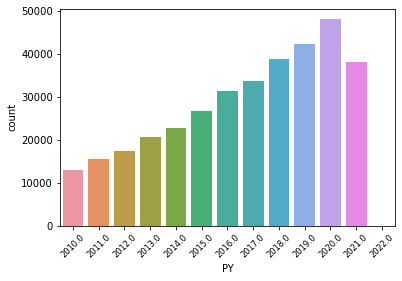

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df, x="PY")


### US vs China

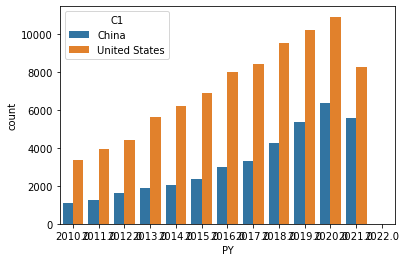

In [12]:
condition_US = (df["C1"].isin(["United States", "China"]))
df_us = df[condition_US]
graph2 = sns.countplot(data = df_us, x = "PY", hue="C1")

### Document Type

In [13]:
df.PT.describe()

count     349497
unique         4
top            J
freq      319414
Name: PT, dtype: object

<AxesSubplot:xlabel='count', ylabel='PT'>

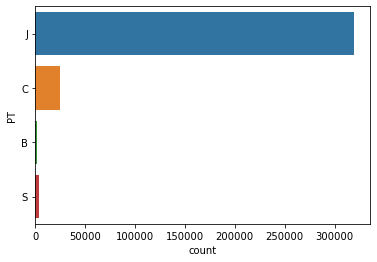

In [14]:
sns.countplot(data = df, y="PT")
# PT	Publication Type (J+AD0-Journal+ADs- B+AD0-Book+ADs- S+AD0-Series+ADs- P+AD0-Patent)

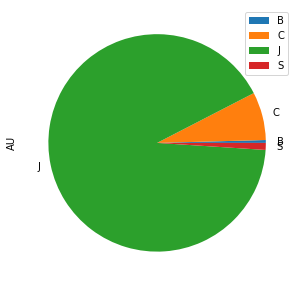

In [15]:
df_pt = df.groupby(["PT"]).count()
df_pt
plot = df_pt.plot.pie(y='AU', figsize=(5, 5), subplots=True)



# Filtering 

```python
keyword_csv = pd.read_csv("data/ai_keywords.csv", sep="\t", encoding="utf-8")
lst_ai = []
for keyword in keyword_csv["Artificial Intelligence"]:
    lst_ai.append(keyword)
pattern = '|'.join([f'(?i){keyword}' for keyword in lst_ai])
condition = df.TXT.str.contains(pattern, na=False)
df = df[condition]
df.to_csv("data/clean_data/full_data_filtered.csv", columns=columns, header=True, index=False, sep='\t')
```

In [16]:
keyword_csv = pd.read_csv("data/ai_keywords.csv", sep="\t", encoding="utf-8")
for keyword in keyword_csv["Artificial Intelligence"]:
    print(keyword)

Artificial intellig*
Automated reasoning
Backpropagation
Computer vision
Data mining
Data science
Deep learning
Expert system*
Face detection
Feature extraction
Generative adversarial network*
Gesture recognition
Image classification
Image recognition
Image segmentation
Information retrieval
Intelligent machine*
Kernel machine
Knowledge representation
Machine intelligence
Machine learning
Machine translation
Meta-learning
Multilayer perceptron*
Natural language processing
Neural net*
Object detection
Object identification
Object recognition
Pattern recognition
Pose estimation
Reinforcement learning
Semantic search
Semi-supervised learning
Sentiment analysis
Speech recognition
Statistical learning
Supervised learning
Text classification
Transfer learning
Transformer network*
Unsupervised learning
Voice recognition


In [17]:
df_filtered = pd.read_csv("data/clean_data/full_data_filtered.csv", sep='\t', encoding='utf-8', index_col=False)
df_filtered.head(5)

,PT,AU,TI,LA,DE,AB,C1,PY,TXT
0,J,"Yang, J; Deng, X; Liu, QQ; Ding, RH",Temperature error-correction method for surfac...,English,climate change; computational fluid dynamics; ...,"In climate change research, accurate temperatu...",China,2020.0,Temperature error-correction method for surfac...
1,J,"Mishra, U; Gautam, S; Riley, WJ; Hoffman, FM",Ensemble Machine Learning Approach Improves Pr...,English,soil organic carbon; spatial prediction; machi...,Various approaches of differing mathematical c...,United States,2020.0,Ensemble Machine Learning Approach Improves Pr...
2,J,"Coro, G",OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...,English,artificial intelligence; big data; blue growth...,The long-term EU strategy to support the susta...,Italy,2020.0,OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...
3,J,"Jung, S; Kim, YJ; Park, S; Im, J",Prediction of Sea Surface Temperature and Dete...,Korean,sea surface temperature; prediction; ocean hea...,Sea Surface Temperature (SST) is an important ...,South Korea,2020.0,Prediction of Sea Surface Temperature and Dete...
4,J,"Siddiqui, S; Conkle, JL; Sadovski, A",Contiguous US surface water availability and s...,English,Wastewater treatment plant effluent flow model...,Surface water is a vital and sometimes stresse...,United States,2020.0,Contiguous US surface water availability and s...


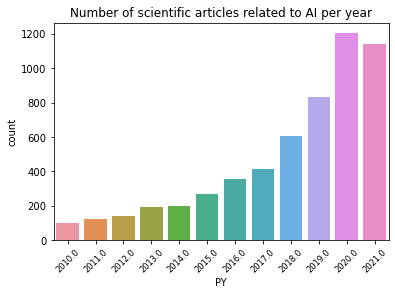

In [18]:
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df_filtered, x="PY").set_title('Number of scientific articles related to AI per year')

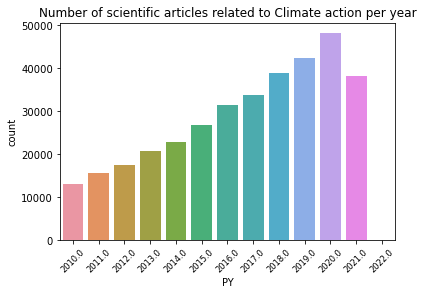

In [19]:
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df, x="PY").set_title('Number of scientific articles related to Climate action per year')

In [20]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5582 entries, 0 to 5581
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PT      5582 non-null   object 
 1   AU      5582 non-null   object 
 2   TI      5582 non-null   object 
 3   LA      5582 non-null   object 
 4   DE      5582 non-null   object 
 5   AB      5582 non-null   object 
 6   C1      5582 non-null   object 
 7   PY      5582 non-null   float64
 8   TXT     5582 non-null   object 
dtypes: float64(1), object(8)
memory usage: 392.6+ KB


### From **382742** rows related to climate change to **5899** rows related climate change AND IA. 1.5% of the corpus is related to IA.

## First Example
'Temperature error-correction method for surface air temperature data climate change; computational fluid dynamics; correction method; **neural network algorithm**; temperature data; temperature error In climate change research, accurate temperature data are often demanded. However, affected by many factors, especially solar radiation, the accuracy of environmental air temperature measurement can be greatly reduced, since there is a difference in temperature between the environmental air and the related temperature measured by the sensor accommodated inside the radiation shield. In the paper, the term "temperature error" refers to the temperature difference described above. To improve the accuracy of the temperature data, a temperature error-correction method is proposed. First, a computational fluid dynamics (CFD) method is adopted to quantify the temperature errors accurately. **A neural network algorithm** is then applied to form a universal correction equation by fitting temperature errors calculated using the CFD method. Finally, to validate the correction equation, field observation experiments are performed. The root mean square error (RMSE) and the mean absolute error (MAE) between the temperature errors obtained experimentally using a sensor inside the DTR503A shield and the corresponding temperature errors determined by using the proposed correction method are 0.043 and 0.038 degrees C, respectively. The RMSE and MAE for the DTR13 radiation shield are 0.049 and 0.044 degrees C, respectively. This method may reduce the error of the temperature data to 0.05 degrees C. If the environmental factors corresponding to the temperature data can be quantified accurately, the factors influencing the temperature error can be added to the correction method continuously. The accuracy of this correction method may be furtherly improved.'


## Second Example
'Ensemble Machine Learning Approach Improves Predicted Spatial Variation of Surface Soil Organic Carbon Stocks in Data-Limited Northern Circumpolar Region soil organic carbon; spatial prediction; **machine learning**; permafrost soils; environmental controllers Various approaches of differing mathematical complexities are being applied for spatial prediction of soil properties. Regression kriging is a widely used hybrid approach of spatial variation that combines correlation between soil properties and environmental factors with spatial autocorrelation between soil observations. In this study, we compared four **machine learning approaches** (**gradient boosting machine, multinarrative adaptive regression spline, random forest, and support vector machine**) with regression kriging to predict the spatial variation of surface (0-30 cm) soil organic carbon (SOC) stocks at 250-m spatial resolution across the northern circumpolar permafrost region. We combined 2,374 soil profile observations (calibration datasets) with georeferenced datasets of environmental factors (climate, topography, land cover, bedrock geology, and soil types) to predict the spatial variation of surface SOC stocks. We evaluated the prediction accuracy at randomly selected sites (validation datasets) across the study area. We found that different techniques inferred different numbers of environmental factors and their relative importance for prediction of SOC stocks. Regression kriging produced lower prediction errors in comparison to multinarrative adaptive regression spline and support vector machine, and comparable prediction accuracy to gradient boosting machine and random forest. However, the ensemble median prediction of SOC stocks obtained from all four machine learning techniques showed highest prediction accuracy. Although the use of different approaches in spatial prediction of soil properties will depend on the availability of soil and environmental datasets and computational resources, we conclude that the ensemble median prediction obtained from multiple machine learning approaches provides greater spatial details and produces the highest prediction accuracy. Thus an ensemble prediction approach can be a better choice than any single prediction technique for predicting the spatial variation of SOC stocks.'


## Evolution by year

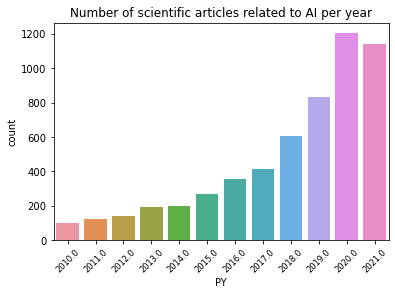

In [21]:
plt.xticks(rotation=45, fontsize="small")
graph = sns.countplot(data = df_filtered, x="PY").set_title('Number of scientific articles related to AI per year')


In [22]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [23]:
import spacy
import string
# spacy_pipeline = spacy.load("en_core_web_sm")
def split_into_tokens_spacy(desc) :
    """
    remove stop words + punctuation and tokenise the sentence
    """
    doc = nlp(desc)
    return [w.text.lower() for w in doc if not (w.is_stop or w.text in string.punctuation)]

In [24]:
tokens_spacy = df_filtered.head(n=1).TXT.apply(split_into_tokens_spacy)[0]
print(tokens_spacy)

['temperature', 'error', 'correction', 'method', 'surface', 'air', 'temperature', 'data', 'climate', 'change', 'computational', 'fluid', 'dynamics', 'correction', 'method', 'neural', 'network', 'algorithm', 'temperature', 'data', 'temperature', 'error', 'climate', 'change', 'research', 'accurate', 'temperature', 'data', 'demanded', 'affected', 'factors', 'especially', 'solar', 'radiation', 'accuracy', 'environmental', 'air', 'temperature', 'measurement', 'greatly', 'reduced', 'difference', 'temperature', 'environmental', 'air', 'related', 'temperature', 'measured', 'sensor', 'accommodated', 'inside', 'radiation', 'shield', 'paper', 'term', 'temperature', 'error', 'refers', 'temperature', 'difference', 'described', 'improve', 'accuracy', 'temperature', 'data', 'temperature', 'error', 'correction', 'method', 'proposed', 'computational', 'fluid', 'dynamics', 'cfd', 'method', 'adopted', 'quantify', 'temperature', 'errors', 'accurately', 'neural', 'network', 'algorithm', 'applied', 'form', 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(tokenizer=split_into_tokens_spacy, min_df=0.01)
# Fit --> "apprentissage" du vocabulaire
bow_transformer.fit(df_filtered.TXT)
# Vocabulaire final : dimension des vecteurs
print(len(bow_transformer.vocabulary_))

/home/kevin-main/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



1990


In [26]:
 # Vocabulaire
feat_names = bow_transformer.get_feature_names()
feat_names

['/-',
 '0',
 '0.5',
 '1',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1990',
 '2',
 '20',
 '2000',
 '2001',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2030',
 '2050',
 '21',
 '24',
 '25',
 '3',
 '30',
 '35',
 '3d',
 '4',
 '40',
 '5',
 '50',
 '6',
 '60',
 '7',
 '70',
 '8',
 '8.5',
 '80',
 '9',
 '90',
 '95',
 'ability',
 'able',
 'absence',
 'absolute',
 'abundance',
 'acceptable',
 'access',
 'according',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'accuracies',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'acquired',
 'acquisition',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'actual',
 'adapt',
 'adaptation',
 'adapted',
 'adaptive',
 'added',
 'addition',
 'additional',
 'additionally',
 'additive',
 'address',
 'addressed',
 'addressing',
 'adequate',

In [27]:
# Transformation de toutes les descriptions en sac de mots
descriptions_bow = bow_transformer.transform(df_filtered.TXT)

In [28]:
# Fréquences des mots et 10 mots les plus fréquents
from collections import Counter

frequencies = Counter()
for i, tok in enumerate(feat_names):
    frequencies[tok] = descriptions_bow.getcol(i).sum()
print(frequencies.most_common(10))

[('data', 10403), ('model', 8244), ('climate', 7347), ('learning', 6231), ('based', 5974), ('neural', 5276), ('models', 5169), ('change', 5025), ('study', 4553), ('machine', 4395)]


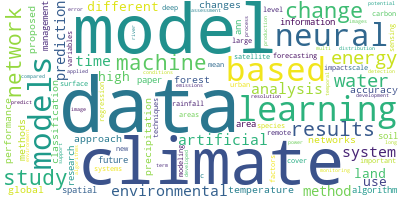

In [29]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

## Full dataframe with a new column AI = True or False

In [31]:
file_path = "data/clean_data/full_data_AI_col.csv"
df2 = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df2.head()


,PT,AU,TI,LA,DE,AB,C1,PY,TXT,AI
0,J,"Xu, B; Zhong, PA; Lu, QW; Zhu, FL; Huang, X; M...",Multiobjective stochastic programming with rec...,English,Reservoir operation; Flood water conservation;...,Flood water conservation realized through real...,China,2020.0,Multiobjective stochastic programming with rec...,False
1,J,"Xu, B; Li, Y; Han, F; Zheng, Y; Ding, W; Zhang...",The transborder flux of phosphorus in the Lanc...,English,Lancang-Mekong River; Phosphorus; Influence of...,Nutrients are critical to the development of p...,United States,2020.0,The transborder flux of phosphorus in the Lanc...,False
2,J,"Xu, M; Xu, LJ; Fang, HJ; Cheng, SL; Yu, GX; Ya...",Alteration in enzymatic stoichiometry controls...,English,Global change factors; Soil microbial communit...,Cultivated grassland can serve as one solution...,China,2020.0,Alteration in enzymatic stoichiometry controls...,False
3,J,"Yaghmaei, L; Koupaei, SS; Jafari, R",Spatiotemporal Response of Rangeland NPP to Dr...,English,rangeland ecosystems; net primary production; ...,This study explored the spatiotemporal variabi...,Iran,2020.0,Spatiotemporal Response of Rangeland NPP to Dr...,False
4,J,"Yang, J; Deng, X; Liu, QQ; Ding, RH",Temperature error-correction method for surfac...,English,climate change; computational fluid dynamics; ...,"In climate change research, accurate temperatu...",China,2020.0,Temperature error-correction method for surfac...,True


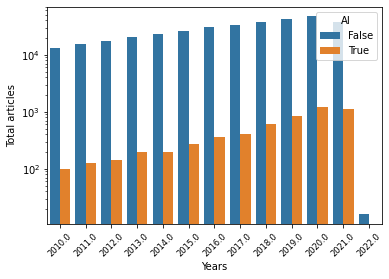

In [34]:
plt.xticks(rotation=45, fontsize="small")
g = sns.countplot(data=df2, x="PY", hue="AI")

g.set_yscale("log")
g.set(xlabel="Years", ylabel="Total articles")
plt.show()

# Log scale doesn't work so great, we need nb_publication_per_year/total_number of publication